<a href="https://colab.research.google.com/github/dtoralg/TheValley_MDS/blob/main/%5B02%5D%20-%20Analisis_Cluster/%5B01%5D%20-%20Notebooks/E1_Bank_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio de Clustering: Segmentación de Clientes de Tarjetas de Crédito


## Introducción, información previa

Primer ejercicio práctico de clustering. Utilizaremos técnicas de aprendizaje no supervisado para segmentar clientes de tarjetas de crédito en diferentes grupos. Este ejercicio tiene como objetivo identificar patrones y comportamientos similares entre los clientes, lo que puede ser útil para personalizar servicios, detectar anomalías y mejorar estrategias de marketing.

### Objetivos del Ejercicio

- **Comprender los conceptos básicos del clustering** y cómo se aplican en el contexto de datos de clientes.
- **Preprocesar los datos** para asegurarnos de que estén en la forma adecuada para el análisis.
- **Aplicar algoritmos de clustering** como K-Means para agrupar a los clientes en distintos segmentos.
- **Evaluar la calidad de los clusters** utilizando métricas adecuadas.
- **Interpretar los resultados** y extraer insights valiosos que puedan ser utilizados en aplicaciones reales.

### Descripción del Conjunto de Datos

El conjunto de datos que utilizaremos contiene información sobre el comportamiento de gasto de los clientes de tarjetas de crédito. Algunas de las características presentes en el dataset incluyen:

- **CUSTID**: Identificación del titular de la tarjeta de crédito
- **BALANCE**: Cantidad de saldo que queda en la cuenta del cliente para realizar compras
- **BALANCE_FREQUENCY**: Frecuencia con la que se actualiza el saldo, puntuación entre 0 y 1 (1 = se actualiza con frecuencia, 0 = no se actualiza con frecuencia)
- **PURCHASES**: Importe de las compras realizadas desde la cuenta
- **ONEOFFPURCHASES**: Importe máximo de compras realizadas de una sola vez
- **INSTALLMENTS_PURCHASES**: Importe de la compra realizada a plazos
- **CASH_ADVANCE**: Efectivo adelantado por el usuario
- **PURCHASES_FREQUENCY**: Frecuencia con la que se realizan las compras, puntuación entre 0 y 1 (1 = compras frecuentes, 0 = compras poco frecuentes)
- **ONEOFF_PURCHASES_FREQUENCY**: Frecuencia con la que se realizan las compras de una sola vez (1 = compras frecuentes, 0 = compras infrecuentes).
- **PURCHASES_INSTALLMENTS_FREQUENCY**: Frecuencia con la que se realizan las compras a plazos (1 = se realizan con frecuencia, 0 = no se realizan con frecuencia)
- **CASH_ADVANCE_FREQUENCY**: Frecuencia con la que se paga en efectivo por adelantado
- **CASH_ADVANCE_TRX**: Número de transacciones realizadas con "Efectivo por adelantado"
- **PURCHASES_TRX**: Número de transacciones de compra realizadas
- **CREDIT_LIMIT**: Límite de la tarjeta de crédito del usuario
- **PAYMENTS**: Importe de los Pagos realizados por el usuario
- **MINUMUM_PAYMENTS**: Importe mínimo de pagos realizados por el usuario
- **PRC_FULL_PAYMENT**: Porcentaje del pago total abonado por el usuario
- **TENURE**: Tenencia del servicio de tarjeta de crédito para el usuario


### Estructura del Notebook

1. **Importación de Librerías y Carga de Datos:** Preparar el entorno de trabajo e importar el dataset.
2. **Exploración de Datos:** Analizar las características principales y obtener una comprensión inicial de los datos.
3. **Preprocesamiento de Datos:** Limpiar y normalizar los datos para asegurar que sean adecuados para el análisis.
4. **Aplicación del Algoritmo de Clustering:** Implementar K-Means y otros algoritmos de clustering.
5. **Evaluación de Resultados:** Utilizar métricas como el coeficiente de silueta para evaluar la calidad de los clusters.
6. **Visualización e Interpretación:** Graficar los clusters y discutir los insights obtenidos.

### Requisitos

Para seguir este notebook, asegúrate de tener instaladas las siguientes librerías de Python:

- `numpy`
- `pandas`
- `matplotlib`
- `seaborn`
- `scikit-learn`

Puedes instalarlas si trabajas EN LOCAL (no necesario en colab) utilizando el siguiente comando:

```bash
pip install numpy pandas matplotlib seaborn scikit-learn


## Importación de librerías y datos

Para este ejercicio de clustering utilizaremos las librerías usuales de pyhton para exploración de datos pandas, numpy, seaborn, matplotlib

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

Para generar los cluster implementaremos un proceso de normalizado con las funciones de sklearn StandardScaler y Normalize.

El algoritmo que nos indicará los clusteres será K-Means según visto en temario

In [2]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans

In [3]:
# Ingestión de los datos desde github
creditcard_df = pd.read_csv('https://raw.githubusercontent.com/dtoralg/TheValley_MDS/refs/heads/main/%5B02%5D%20-%20Analisis_Cluster/%5B02%5D%20-%20Data/credit_card_data.csv')

# Podemos encontrar los datos originales en Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

In [4]:
# Exploramos la forma general del dataset previsualizando algunas filas del mismo
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Análisis exploratorio

In [5]:
creditcard_df.info()
# Apreciamos missing values en algunos campos, y tenemos 18 variables (objetos, float e int) con 8950 observaciones.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


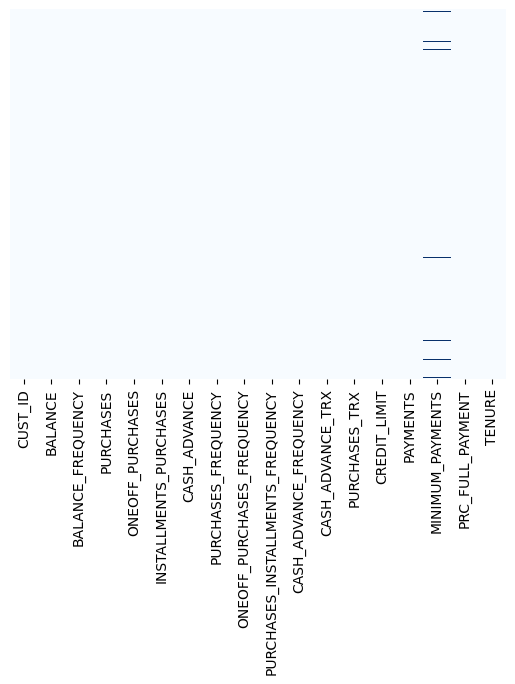

In [6]:
# Evaluamos los campos que tienen missing data
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
creditcard_df.isnull().sum()

In [7]:
# Imputamos los missing values por la media
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()


<Axes: >

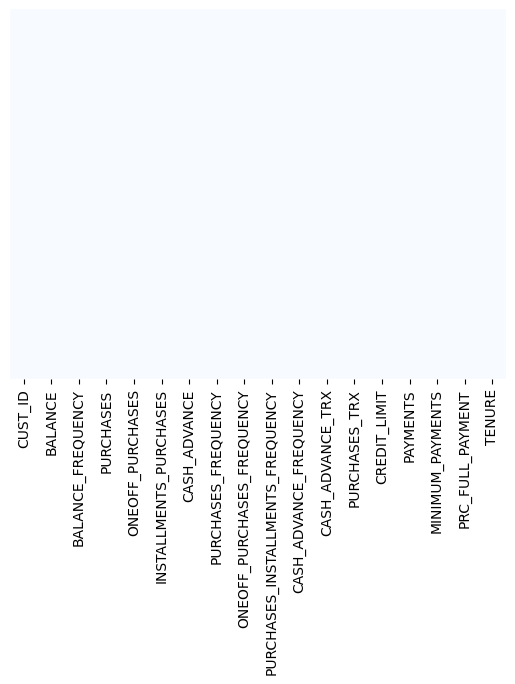

In [8]:
# Re-chequeamos que no sigan existiendo valores null
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [9]:
# Evaluamos valores duplicados en el dataset, confirmamos que no existen valores duplicados
creditcard_df.duplicated().sum()

np.int64(0)

Como 'CUST_ID' es información arbitraria lo excluimos del dataset para no entontrar correlaciones espúreas con otras características

In [10]:
creditcard_df.drop("CUST_ID", axis = 1, inplace= True)

In [11]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Análisis exploratorio: distribución y correlación



#### Gráficos de distribución

Para ello usaremos un histograma (histplot) con KDE (Kernel Density Estimate) habilitado.

Este gráfico nos muestra la distribución y la frecuencia de los valores respecto a la muestra

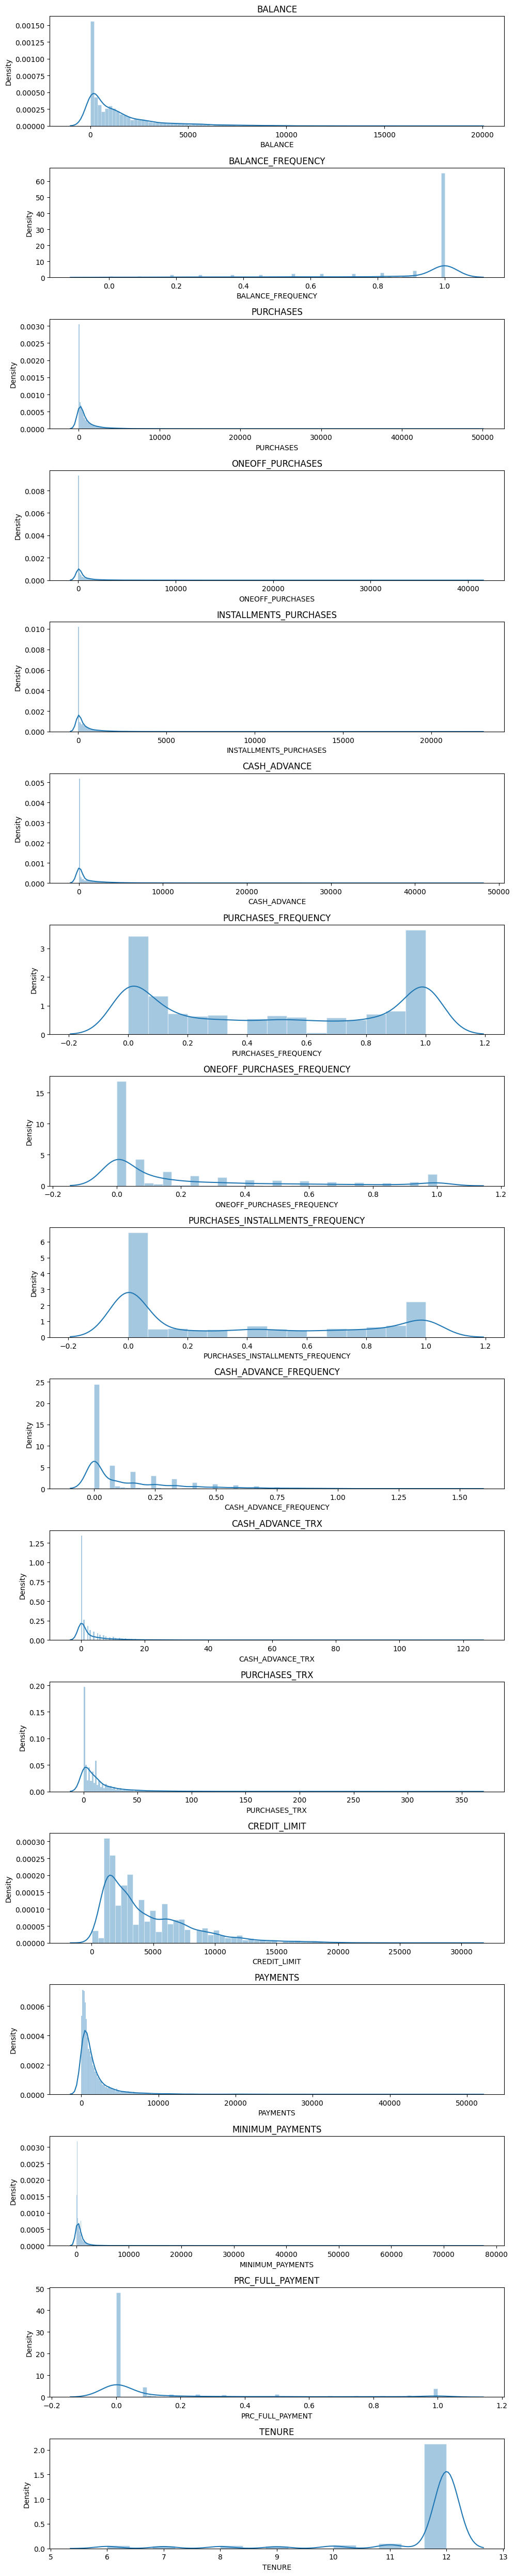

In [12]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i+1)
  sns.histplot(
      creditcard_df[creditcard_df.columns[i]],
      kde=True,
      stat="density",
      kde_kws=dict(cut=3),
      alpha=.4,
      edgecolor=(1, 1, 1, .4)
)
  plt.title(creditcard_df.columns[i])

plt.tight_layout()

##### Ejercicio 1


Ejercicio 1: Hallar la media del balance

Ejercicio 1.1: Hallar el valor máximo de `CASH_ADVANCE`

Ejercicio 1.1: ¿En qué valor se agrupa más frecuentemente `Balance_Frequency`?

Ejercicio 1.2: ¿Cuántas agrupaciones de valores (clústeres) podemos encontrar a simple vista en `PURCHASES_FREQUENCY`?

In [13]:
# Puedes anotar tus respuestas y cálculos aquí.


#### Matriz de correlación

La matriz de correlación nos permite identificar aquellas variables más dependientes (peor clustering) y más independientes. Es una buena base para realizar un primer análisis de cómo podemos segmentar nuestros datos.

<Axes: >

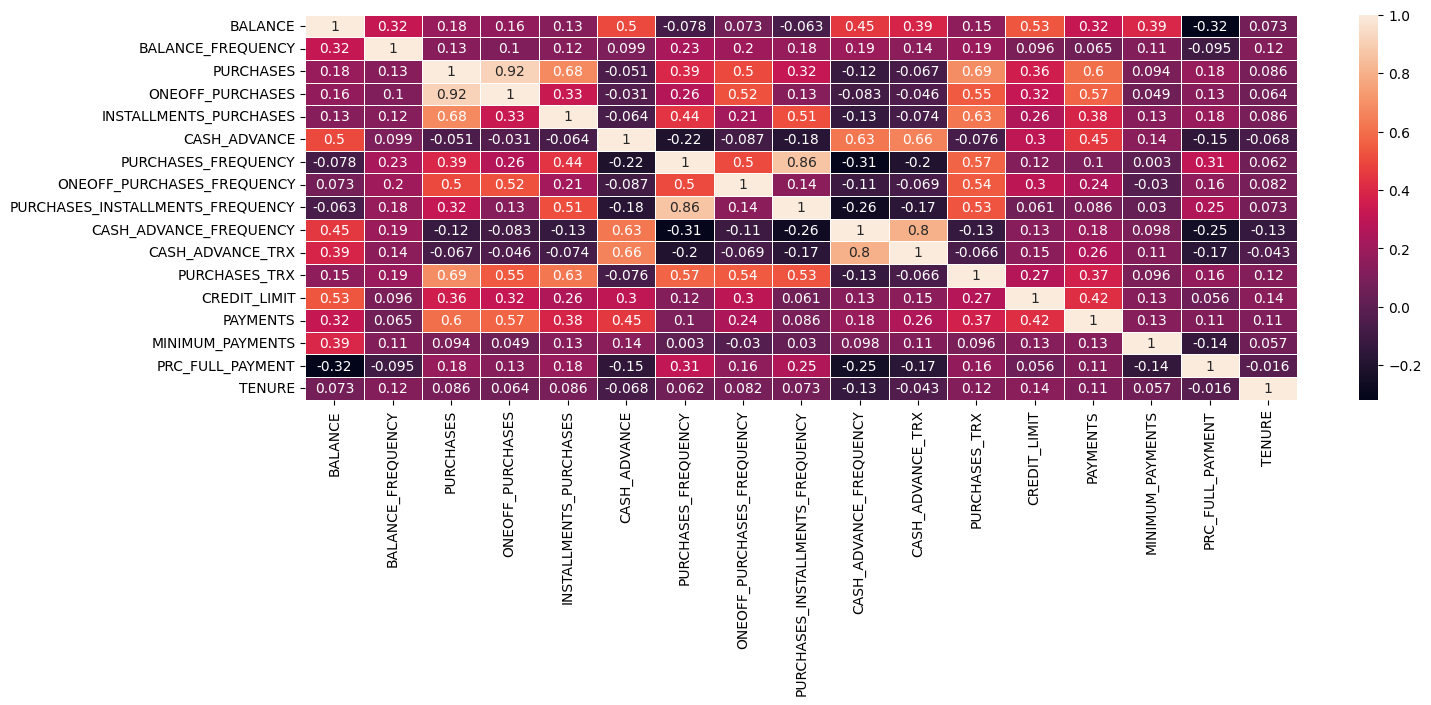

In [14]:
# @title
correlations = creditcard_df.corr()
plt.figure(figsize = (16,5))
sns.heatmap(correlations, annot = True, linewidths=.5)

## Clusterización usando k-means y el método del codo


In [15]:
# Normalizamos los datos
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

#### Método del codo

Elaboramos un primer k-means de manera iterativa con un [1,15] clústeres

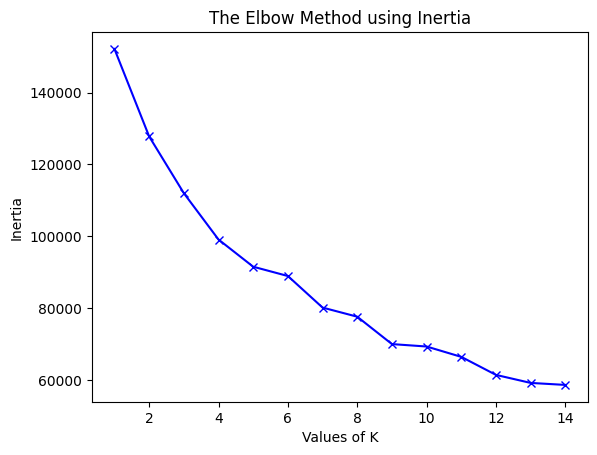

In [16]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 15)

for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init = 'auto')
    kmeanModel.fit(creditcard_df_scaled)

    distortions.append(sum(np.min(cdist(creditcard_df_scaled, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / creditcard_df_scaled.shape[0])
    inertias.append(kmeanModel.inertia_)

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()


Ejercicio 2: ¿Cuántos clústeres deberíamos tomar como valor de k viendo el gráfico anterior?

In [17]:
# Indica aquí el valor del numero de clústeres elegido
numero_de_clusteres = 0

#### Creación del modelo de clustering k = 8

In [18]:
kmeans = KMeans(numero_de_clusteres, n_init = 'auto', init='k-means++', random_state= 42)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

InvalidParameterError: The 'n_clusters' parameter of KMeans must be an int in the range [1, inf). Got 0 instead.

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

# Evaluamos las distancias del centroide de cada variable con el centro de cada uno de los clústeres.
# Este valor nos indica la distancia euclídea entre la media de cada variable (centroide) con el centro de cada uno de los 8 clústeres que hemos definido

In [ ]:
# Deshacemos la transformación de normalización y escalado para poder obtener conclusiones reales sobre los datos
# Estos valores representan las medias de cada clúster respecto a cada variable, no de los datos.

cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

##### Ejercicio 3: Interpretación de datos de los clústeres

*   3.1 ¿Qué conclusiones sacamos de la anterior tabla sobre los clientes del clúster 7?

-
*   3.2 ¿Qué conclusiones sacamos de la anterior tabla sobre los clientes del clúster 6?

-
*   3.3 ¿Cómo podríamos mejorar nuestra estrategia de marketing para estos dos grupos de clientes?

In [ ]:
# Indica tus respuestas aquí

###### Ayuda para el ejercicio 2: apóyate en las definiciones de las variables

- **CUSTID**: Identificación del titular de la tarjeta de crédito
- **BALANCE**: Cantidad de saldo que queda en la cuenta del cliente para realizar compras
- **BALANCE_FREQUENCY**: Frecuencia con la que se actualiza el saldo, puntuación entre 0 y 1 (1 = se actualiza con frecuencia, 0 = no se actualiza con frecuencia)
- **PURCHASES**: Importe de las compras realizadas desde la cuenta
- **ONEOFFPURCHASES**: Importe máximo de compras realizadas de una sola vez
- **INSTALLMENTS_PURCHASES**: Importe de la compra realizada a plazos
- **CASH_ADVANCE**: Efectivo adelantado por el usuario
- **PURCHASES_FREQUENCY**: Frecuencia con la que se realizan las compras, puntuación entre 0 y 1 (1 = compras frecuentes, 0 = compras poco frecuentes)
- **ONEOFF_PURCHASES_FREQUENCY**: Frecuencia con la que se realizan las compras de una sola vez (1 = compras frecuentes, 0 = compras infrecuentes).
- **PURCHASES_INSTALLMENTS_FREQUENCY**: Frecuencia con la que se realizan las compras a plazos (1 = se realizan con frecuencia, 0 = no se realizan con frecuencia)
- **CASH_ADVANCE_FREQUENCY**: Frecuencia con la que se paga en efectivo por adelantado
- **CASH_ADVANCE_TRX**: Número de transacciones realizadas con "Efectivo por adelantado"
- **PURCHASES_TRX**: Número de transacciones de compra realizadas
- **CREDIT_LIMIT**: Límite de la tarjeta de crédito del usuario
- **PAYMENTS**: Importe de los Pagos realizados por el usuario
- **MINUMUM_PAYMENTS**: Importe mínimo de pagos realizados por el usuario
- **PRC_FULL_PAYMENT**: Porcentaje del pago total abonado por el usuario
- **TENURE**: Tenencia del servicio de tarjeta de crédito para el usuario

#### Predicción de la pertenencia de cada punto de datos a cada clúster.

In [ ]:
# Con el método fit_predict podemos predecir a qué cluster pertenece un conjunto de datos (preexistente o nuevo)
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

In [ ]:
# Identificamos a qué cluster pertenece cada observacion del dataset inicial
creditcard_df_cluster = pd.concat([pd.DataFrame({'cluster':labels}), creditcard_df], axis = 1)
creditcard_df_cluster.head(10)

In [ ]:
# Comparamos cómo afecta k a la distribución de forma gráfica

n_clusters = [5, 8, 12]

fig, axes = plt.subplots(1, len(n_clusters), figsize=(14, 4))

for n, ax in zip(n_clusters, axes):
  # Repetimos el entrenamiento para cada valor de n_clusters
  kmeans = KMeans(n_clusters=n, random_state= 42, n_init = 'auto', init='k-means++',)
  kmeans.fit(creditcard_df_scaled)
  prediction = kmeans.predict(creditcard_df_scaled)
  ax.set_title(f"n_clusters: {n}")

  for i in range(n):
    credicard_df_i = creditcard_df_scaled[prediction == i]
    ax.scatter(credicard_df_i[:,0], credicard_df_i[:,3], label = f"Cluster {i+1}")

  ax.legend()